# Demo of the Rig Veda API

Documentation for the API is at https://aninditabasu.github.io/indica/html/rv.html.

To run the demo, on the menu bar, click **Cell** > **Run All**. The code output is generated and displayed below each of the questions. Scroll :-)

In [1]:
import json
import requests
import matplotlib.pyplot as plt
import collections

r = requests.get('https://api-rv.herokuapp.com/rv/v1/resources/all')

json_data = json.loads(json.dumps(r.json()))


#### Which book has how many verses?

Number of books: 10
Book number 1 has 191 verses.
Book number 2 has 42 verses.
Book number 3 has 62 verses.
Book number 4 has 58 verses.
Book number 5 has 87 verses.
Book number 6 has 75 verses.
Book number 7 has 104 verses.
Book number 8 has 103 verses.
Book number 9 has 114 verses.
Book number 10 has 191 verses.


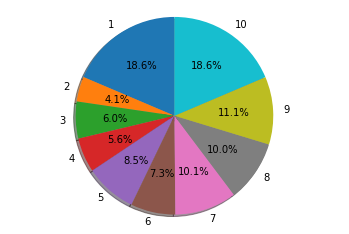

In [2]:
last_book=json_data[(len(json_data))-1]['mandal']
print('Number of books:', last_book)

book_list=[]
verse_list=[]
book_number = 1
verse_number = []

while book_number < last_book+1:
    for line in json_data:
        if line['mandal']==book_number:
            verse_number.append(line['sukta'])
    print ('Book number', book_number, 'has',max(verse_number),'verses.')
    book_list.append(book_number)
    verse_list.append(max(verse_number))
    verse_number = []    
    book_number = book_number + 1


fig1, ax1 = plt.subplots()
ax1.pie(verse_list, labels=book_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### To whom are the first and last verses addressed to?

In [3]:
first = json_data[0]
last = json_data[(len(json_data))-1]
for k, v in first.items():
    if k=='sungfor':
        print('The first verse is for',v)
for k, v in last.items():
    if k=='sungfor':
        print('The last verse is for',v)


The first verse is for Agni
The last verse is for Agni


#### Who all are the poets?

Total poets: 355


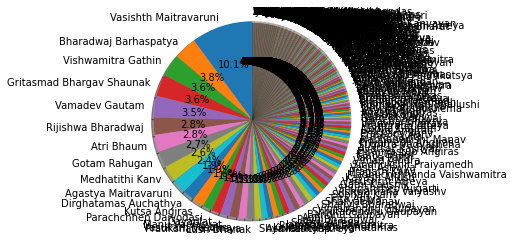

In [4]:
poets=[]
poet_poemcount=[]

unique_poets = collections.Counter(poet['sungby'] for poet in json_data)
print ('Total poets:',len(unique_poets))
print('=================')
poet_list=unique_poets.most_common()
for k,v in poet_list:
    #print(k,v)
    poets.append(k)
    poet_poemcount.append(v)

fig1, ax1 = plt.subplots()
ax1.pie(poet_poemcount, labels=poets, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### And who were they singing to?

Total gods: 226


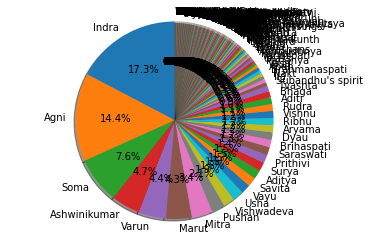

In [5]:
gods=[]
god_poemcount=[]

unique_gods = collections.Counter(god['sungfor'] for god in json_data)
print ('Total gods:',len(unique_gods))
print('=================')
god_list=unique_gods.most_common()
for k,v in god_list:
    gods.append(k)
    god_poemcount.append(v)

fig1, ax1 = plt.subplots()
ax1.pie(god_poemcount, labels=gods, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### Whoa! So, is that where the term *33 crore gods* come from?

We don't know! FWIW, the book itself says there are 33, of whom 11 live in heaven, 11 on earth, and the remaining 11 in the sea:

`ये देवासो दिव्येकादश स्य पृथिव्यामध्येकादश स्थ। अप्सुक्षितो महिनैकादश स्थ ते देवासो यज्ञमिमं जुषध्वम् ॥`

For an English translation, see the last para at https://en.wikisource.org/wiki/The_Rig_Veda/Mandala_1/Hymn_139.

#### Okay, give me the entire god-list, please?

In [6]:
for god in gods:
    print (god)

Indra
Agni
Soma
Ashwinikumar
Varun
Marut
Mitra
Pushan
Vishwadeva
Usha
Vayu
Savita
Aditya
Surya
Prithivi
Saraswati
Brihaspati
Dyau
Aryama
Ribhu
Vishnu
Rudra
Aditi
Bhaga
Tvashta
Subandhu's spirit
Ila
Nakt
Brahmanaspati
Apah
Vasu
Parjanya
Grass
Vanaspati
Parvat
Ahirbudhnya
Narashans
Door
Svaha
Cow
Sindhu
Dadhikra
Pitri
Indra Vaikunth
Mahi
Tanunapat
Yama
Asamati
Herbs
Ajaikapad
Nirriti
Bhavavritta
Indrani
Rivers
Vak
Food
Bharati
Devapatni
Sacrificer
Pitrimedh
Gods
Savarni
Stone
Manyu
Wedding blessings
Varunani
Ratri
Sacrificial post
Svanaya Bhavayavya
Horse
Poison
Curse
Trasadasyu Paurukutsya
Urvashi
Sarama
Prastok Srinjay
Chariot
Vata
Arrows
Purandhi
Pakasthama Kauryan
Praskanv
Dhata
Asuniti
Hand
Chandrama
Nightmares
Ritu
Agnayi
Mortar
Tarkshya
Agastya Maitravaruni
Trita
Raka
Apam Napat
Birds
Chariot parts
Vamadev Gautam
Hawk
Field owner
Ox
Ghee
Ushana
Rodasi
Shashiyasi
Bow
Vastoshpati
Saraswan
Frogs
Kurung
Kashu
Varu Saushamni
Saushaman
Husband and wife
Havirdhan
Prajapati
Dice
Angiras
K

#### How is 'Plough' a god?

We don't know if it is or is not. What we do know that there are hymns addressed to it :smiley:

#### I've heard that women also composed some of these verses. Can you give me their names?

Sure!

In [7]:
female_poets=[]
for item in json_data:
        for k,v in item.items():
            if k=='sungbycategory':
                if 'female' in v:
                    female_poets.append(item['sungby'])
print(collections.Counter(female_poets))

Counter({'Vishwavara Atreyi': 4, 'Ghosha Kakshivati': 3, 'Indrani': 3, 'Suditi': 2, 'Apala Atreyi': 2, 'Yami Vaivasvati': 2, 'Vagambhrini': 2, 'Romasha': 1, 'Lopamudra': 1, 'Rivers': 1, 'Aditi': 1, 'Indrasnusha Vasukra Patni': 1, 'Urvashi': 1, 'Shraddha Kamayani': 1, "Indra's mother": 1, 'Shachi Paulomi': 1})


#### Where is the complete documentation for this API?

https://aninditabasu.github.io/indica/index.html.